In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('ManyRatings_Dataset_Cleaned.csv') # Read csv

In [2]:
df.columns

Index(['Movie_name', 'Release_Year', 'IMDB_Rating', 'Metascore',
       'Reviewer_count', 'Censor_Board_Rating', 'Genre_1', 'Genre_2',
       'Genre_3', 'Director', 'Writer_1', 'Writer_2', 'Star_1', 'Star_2',
       'Star_3', 'Plot_Keywords', 'Budget', 'Gross_USA', 'Cum_Worldwide_Gross',
       'Production_Company', 'Length_in_minutes', 'Release_Month'],
      dtype='object')

# Do user rating similar to critics ratings?

In [3]:
df["RatingDiff"]=(df["IMDB_Rating"]*10)/df["Metascore"]

Text(0, 0.5, 'UserRating/CriticRating')

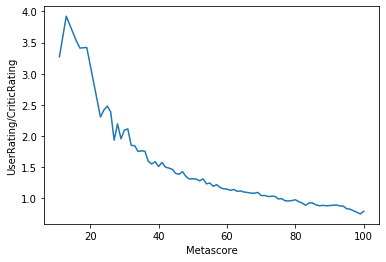

In [4]:
df.groupby('Metascore').RatingDiff.mean().plot(kind='line')
plt.ylabel('UserRating/CriticRating')

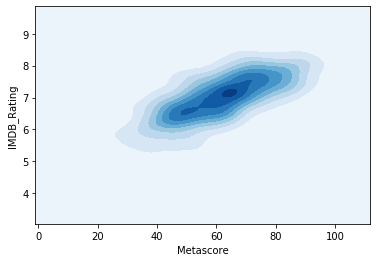

In [5]:
sn.kdeplot(df.Metascore, df.IMDB_Rating,  cmap="Blues", shade=True, shade_lowest=True )

# # which year was the best for movie production?

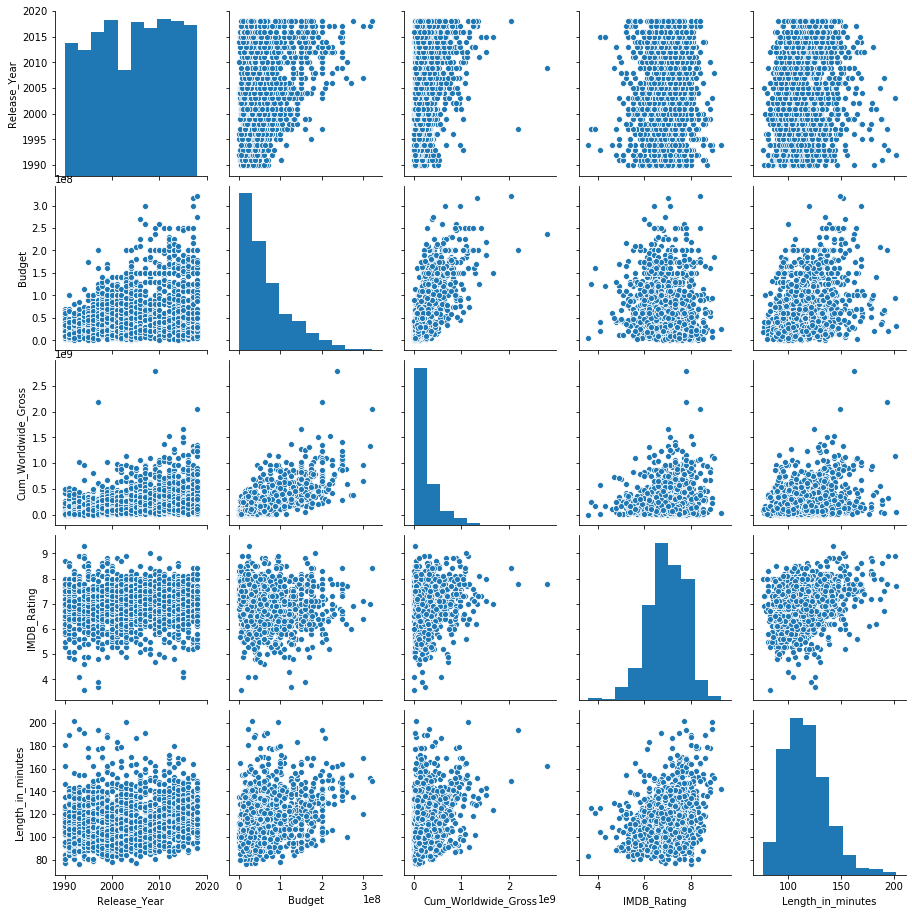

In [6]:
sn.pairplot(df[['Release_Year','Budget', 'Cum_Worldwide_Gross', 'IMDB_Rating', 'Length_in_minutes']])

Text(0, 0.5, 'Average Worldwide gross in millions')

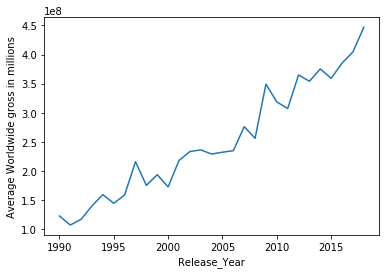

In [7]:
df.groupby('Release_Year').Cum_Worldwide_Gross.mean().plot(kind='line')
plt.ylabel('Average Worldwide gross in millions')

Text(0, 0.5, 'Average Worldwide gross in millions')

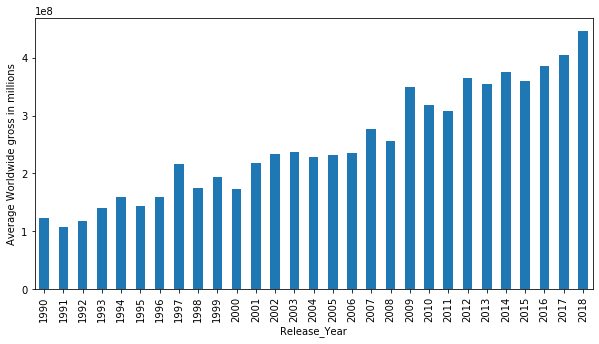

In [8]:
df.groupby('Release_Year').Cum_Worldwide_Gross.mean().plot(kind='bar',figsize=(10,5))
plt.ylabel('Average Worldwide gross in millions')

Text(0, 0.5, 'Average Yearly Budget in millions')

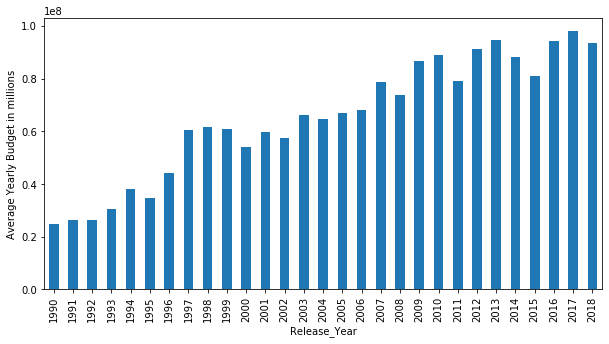

In [9]:
df.groupby('Release_Year').Budget.mean().plot(kind='bar',figsize=(10,5))
plt.ylabel('Average Yearly Budget in millions')

In [10]:
df["EarningRatio"]=df["Cum_Worldwide_Gross"]/df["Budget"]

Text(0, 0.5, 'Average Earning Ratio')

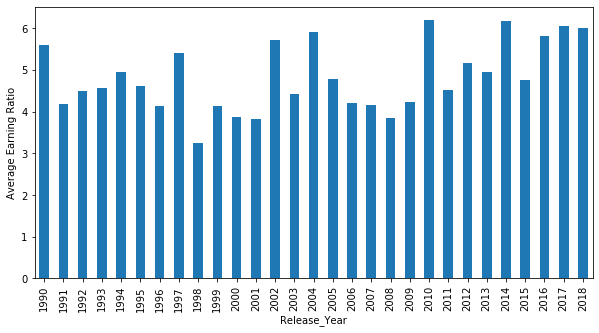

In [11]:
df.groupby('Release_Year').EarningRatio.mean().plot(kind='bar',figsize=(10,5))
plt.ylabel('Average Earning Ratio')

Text(0, 0.5, 'Average Movies Metascore over the years')

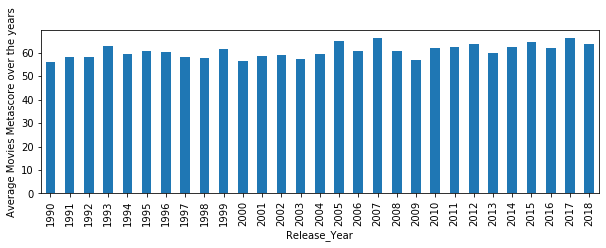

In [12]:
df.groupby('Release_Year').Metascore.mean().plot(kind='bar',figsize=(10,3))
plt.ylabel('Average Movies Metascore over the years')

Text(0, 0.5, 'Average Movies Worldwide Gross')

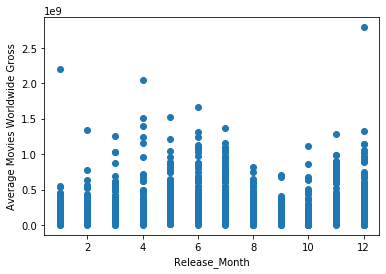

In [13]:
plt.scatter(df.Release_Month, df.Cum_Worldwide_Gross) # Worldwide Gross By Month
plt.xlabel('Release_Month')
plt.ylabel('Average Movies Worldwide Gross')

Text(0, 0.5, 'Average Movies Worldwide_Gross')

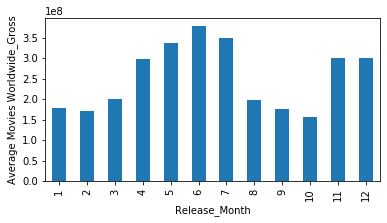

In [14]:
df.groupby('Release_Month').Cum_Worldwide_Gross.mean().plot(kind='bar',figsize=(6,3))
plt.ylabel('Average Movies Worldwide_Gross')

Text(0, 0.5, 'Average Movies Earning Ratio')

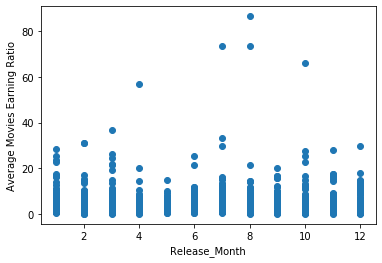

In [15]:
plt.scatter(df.Release_Month, df.EarningRatio) # EarningRatio By Month
plt.xlabel('Release_Month')
plt.ylabel('Average Movies Earning Ratio')

Text(0, 0.5, 'Average Movies EarningRatio')

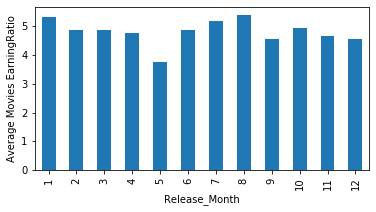

In [16]:
df.groupby('Release_Month').EarningRatio.mean().plot(kind='bar',figsize=(6,3))
plt.ylabel('Average Movies EarningRatio')

Text(0, 0.5, 'Movies Amount')

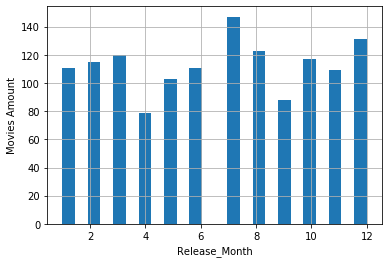

In [17]:
df.Release_Month.hist(bins=24)
plt.xlabel('Release_Month')
plt.ylabel('Movies Amount')

## Which genres people rate higher?

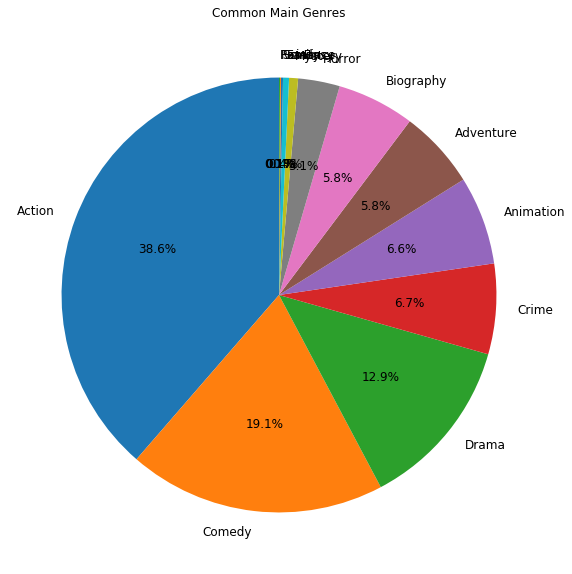

In [18]:
df["Genre_1"].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%',figsize=(20,10),fontsize=12)
plt.title('Common Main Genres')
plt.ylabel('')
plt.show()

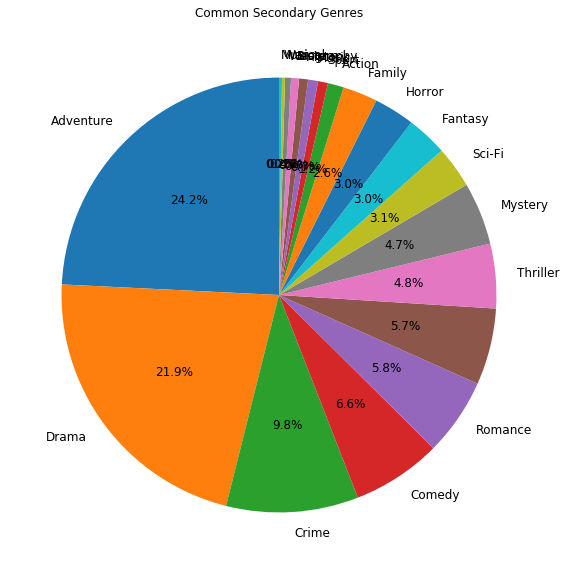

In [19]:
df["Genre_2"].value_counts().plot(kind='pie',startangle=90, autopct='%1.1f%%',figsize=(10,10),fontsize=12)
plt.title('Common Secondary Genres')
plt.ylabel('')
plt.show()

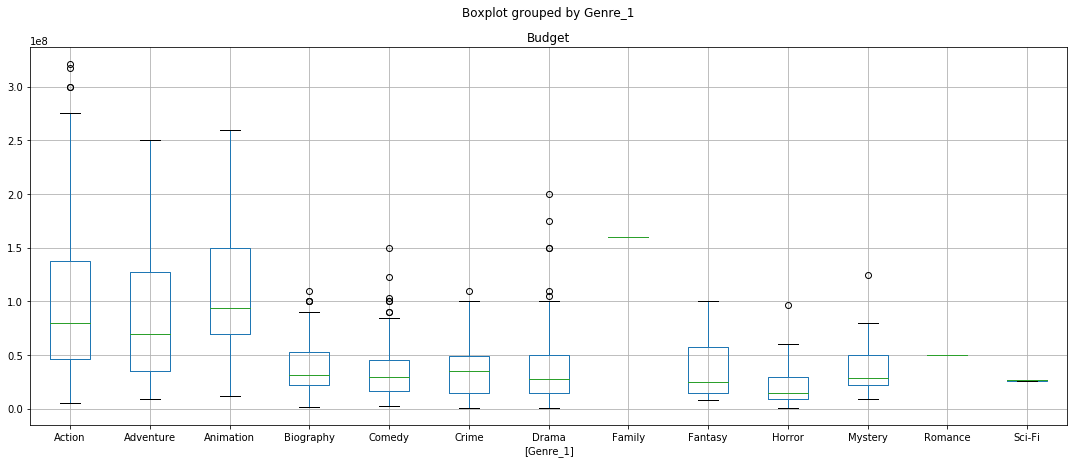

In [20]:
data = df[['Genre_1', 'Budget']]
data.boxplot(by='Genre_1', figsize = (18,7))

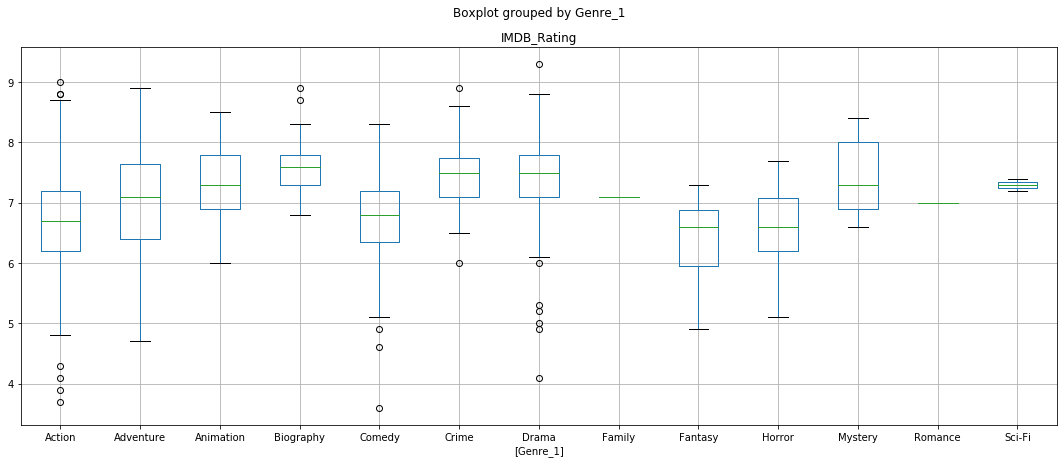

In [21]:
data = df[['Genre_1', 'IMDB_Rating']]
data.boxplot(by='Genre_1', figsize = (18,7))

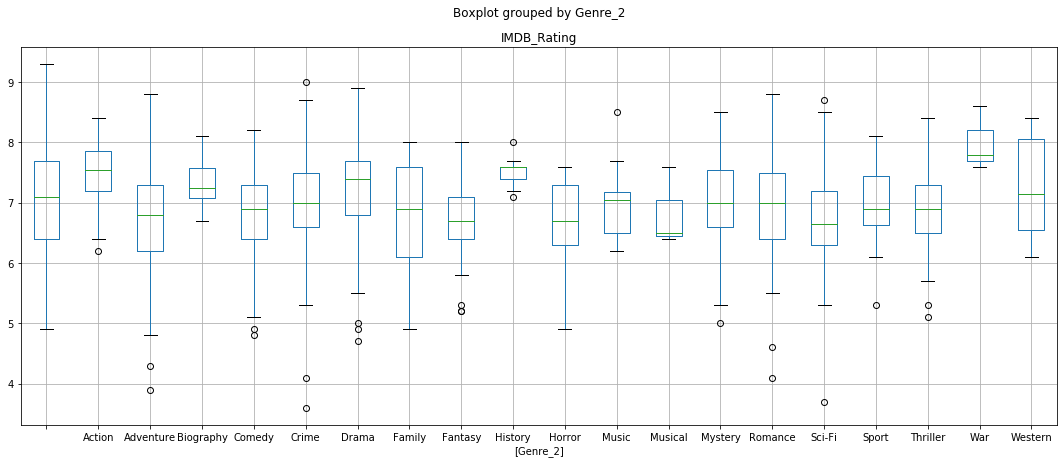

In [22]:
data = df[['Genre_2', 'IMDB_Rating']]
data.boxplot(by='Genre_2', figsize = (18,7))

Text(0.5, 0, 'Combination of Genres')

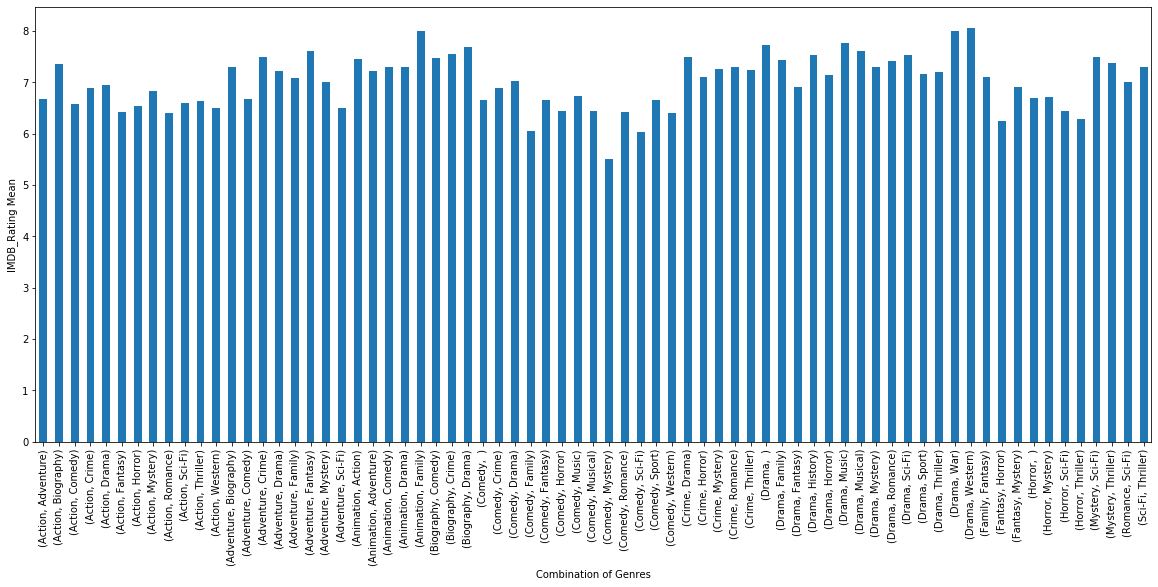

In [23]:
df.groupby(['Genre_1','Genre_2']).IMDB_Rating.mean().plot(kind='bar',figsize=(20,8))
plt.ylabel('IMDB_Rating Mean')
plt.xlabel('Combination of Genres')

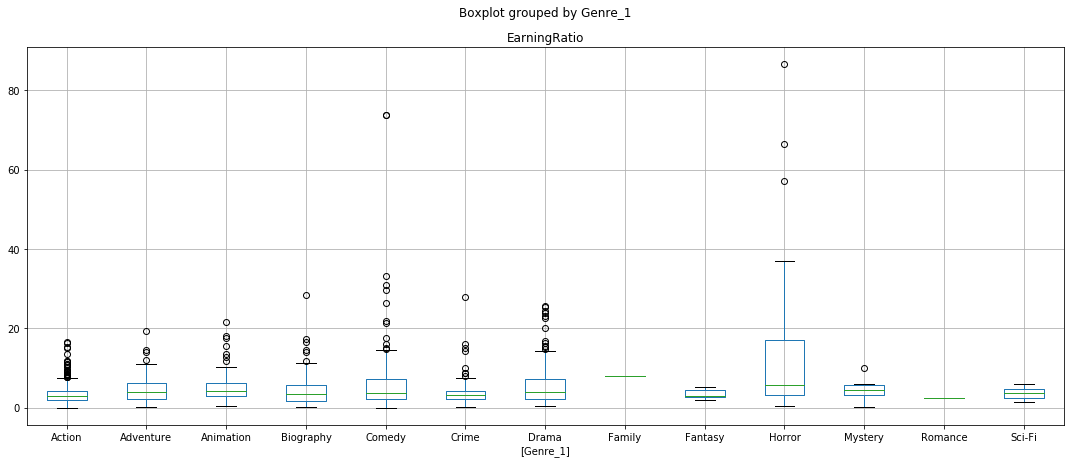

In [24]:
data = df[['Genre_1', 'EarningRatio']]
data.boxplot(by='Genre_1', figsize = (18,7))

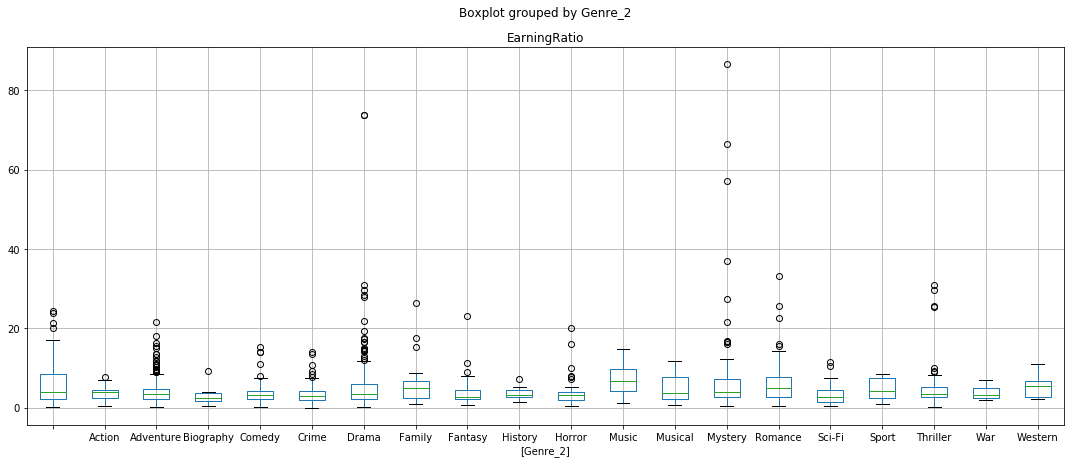

In [25]:
data = df[['Genre_2', 'EarningRatio']]
data.boxplot(by='Genre_2', figsize = (18,7))

Text(0.5, 0, 'Combination of Genres')

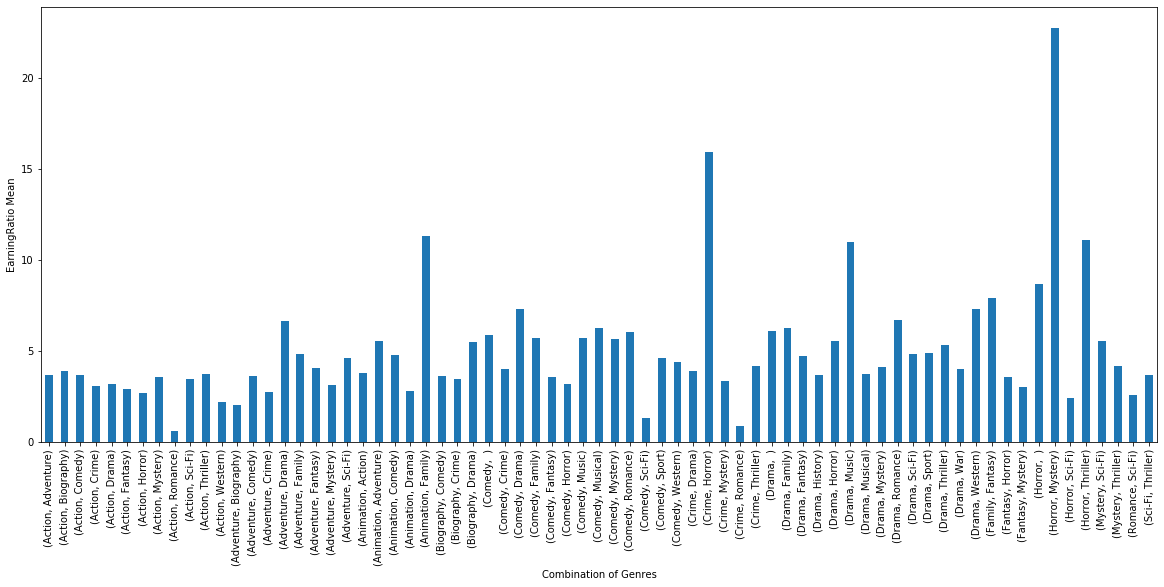

In [26]:
df.groupby(['Genre_1','Genre_2']).EarningRatio.mean().plot(kind='bar',figsize=(20,8))
plt.ylabel('EarningRatio Mean')
plt.xlabel('Combination of Genres')

## How long should a succesfull movie be?

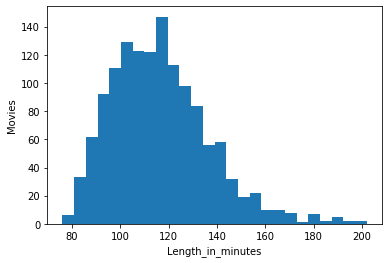

In [27]:
plt.hist(df['Length_in_minutes'], bins= 'auto') #Length_in_minutes Plot
plt.xlabel("Length_in_minutes")
plt.ylabel("Movies")
plt.show()

In [28]:
df["LengthTens"]=df["Length_in_minutes"]//10

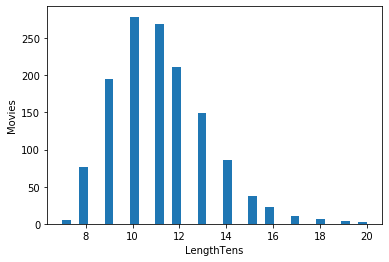

In [29]:
plt.hist(df['LengthTens'], bins= 'auto') #Length_in_minutes Plot
plt.xlabel("LengthTens")
plt.ylabel("Movies")
plt.show()

Text(0, 0.5, 'Average EarningRatio')

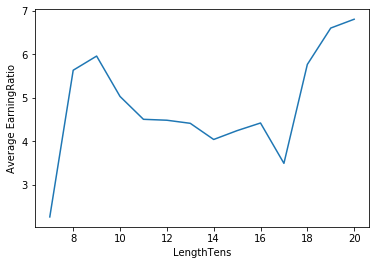

In [30]:
df.groupby('LengthTens').EarningRatio.mean().plot(kind='line')
plt.ylabel('Average EarningRatio')

Text(0, 0.5, 'Average Cum_Worldwide_Gross')

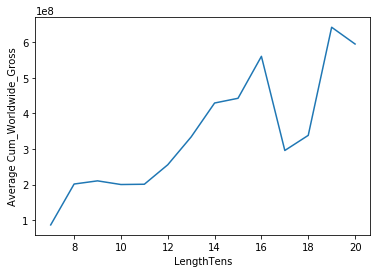

In [31]:
df.groupby('LengthTens').Cum_Worldwide_Gross.mean().plot(kind='line')
plt.ylabel('Average Cum_Worldwide_Gross')

Text(0, 0.5, 'Average Metascore')

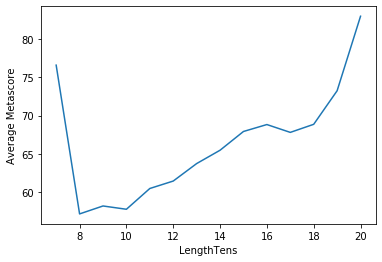

In [32]:
df.groupby('LengthTens').Metascore.mean().plot(kind='line')
plt.ylabel('Average Metascore')

Text(0, 0.5, 'Average IMDB_Rating')

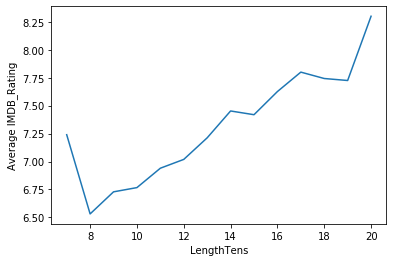

In [33]:
df.groupby('LengthTens').IMDB_Rating.mean().plot(kind='line')
plt.ylabel('Average IMDB_Rating')